# Classification of Images using Logistic Regression

> ## Importing Required Libraries

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix

> ## Loading the Dataset

In [4]:
digits = load_digits()

> ## Determining the total number of images and labels

In [6]:
print('Image Data Shape: ', digits.data.shape)
print('Label Data Shape: ', digits.target.shape)

Image Data Shape:  (1797, 64)
Label Data Shape:  (1797,)


> ## Displaying some of the images and labels

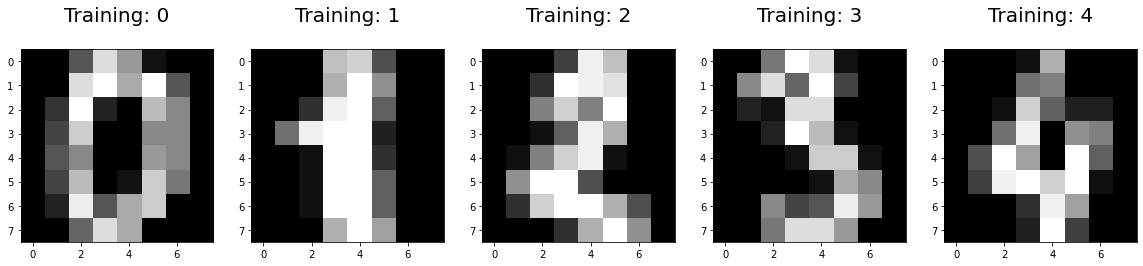

In [7]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0: 5], digits.target[0: 5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

> ## Dividing the dataset into Training and Test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [9]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

In [10]:
y_train.shape, y_test.shape

((1383,), (414,))

> ## Import Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression

> ## Making an instance of the model and training it

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

> ## Predicting the output of the first element of the test set

In [19]:
print(log_reg.predict(X_test[0].reshape(1, -1)))

[4]


> ## Predicting the output of the first 10 elements of the test set

In [15]:
print(log_reg.predict(X_test[ : 10]))

[4 0 9 1 8 7 1 5 1 6]


> ## Predicting the entire dataset

In [20]:
y_pred = log_reg.predict(X_test)

> ## Determining the accuracy of the model

In [21]:
score = log_reg.score(X_test, y_test)
print(score)

0.9516908212560387


> ## Representing the confusion matrix in a heat map

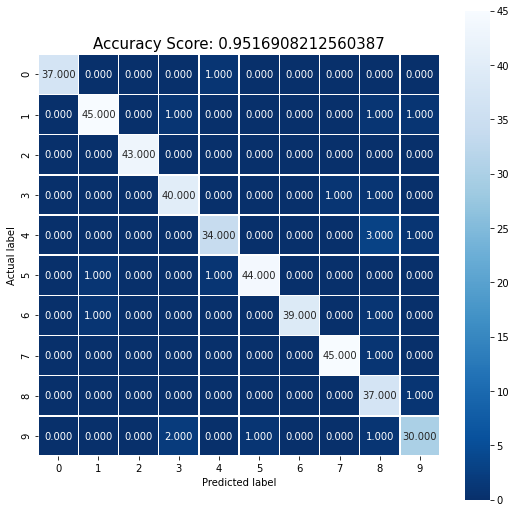

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3f', linewidth=0.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {score}'
plt.title(all_sample_title, size=15);

> ## Displaying some of correctly predicted labels

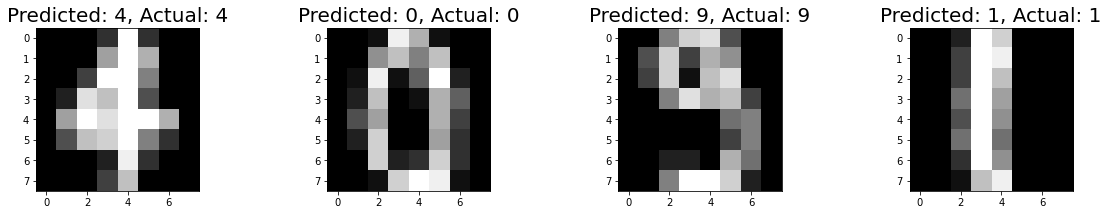

In [29]:
index = 0
classifiedIndex = []
for predict, actual in zip(y_pred, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

plt.figure(figsize=(20, 3))
for plotIndex, correct in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[correct], (8, 8)), cmap=plt.cm.gray)
    plt.title(f'Predicted: {y_pred[correct]}, Actual: {y_test[correct]}', fontsize=20)

> ## Displaying some of incorrectly predicted labels

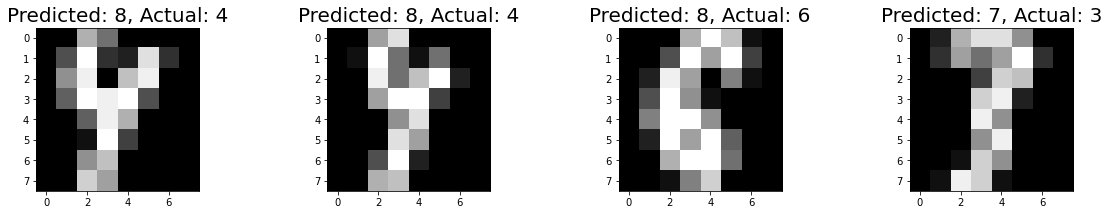

In [30]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(y_pred, y_test):
    if predict != actual:
        misclassifiedIndex.append(index)
    index += 1

plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title(f'Predicted: {y_pred[wrong]}, Actual: {y_test[wrong]}', fontsize=20)